In [16]:
import pandas as pd
import numpy as np
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")
from gensim.models import Doc2Vec
from sklearn import utils
from sklearn.model_selection import train_test_split
import gensim
from sklearn.linear_model import LogisticRegression
from gensim.models.doc2vec import TaggedDocument
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
embeddings = models.KeyedVectors.load_word2vec_format("../data/GoogleNews-vectors-negative300.bin", binary=True)

In [40]:
df = pd.read_csv("data/test.csv")
df = df.sample(frac=1, random_state=42).reset_index(drop=True)
df.article = df.article.apply(lambda x: x.replace("SHARE","")).apply(lambda x: x.lower())
df.head()

,article,label
0,here’s a line to amuse your liberal pals: when...,right
1,we’ve been hearing a lot of speculation that t...,right
2,"physicians spreading medical misinformation, p...",right
3,"washington, d.c. -- eighty-two percent of amer...",center
4,"washington, d.c. -- fifty-six percent of ameri...",center


In [41]:
df.article.apply(lambda x: len(x.split(' '))).sum()

3498818

In [42]:
cnt_pro = df['label'].value_counts()

/home/ekostrov/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


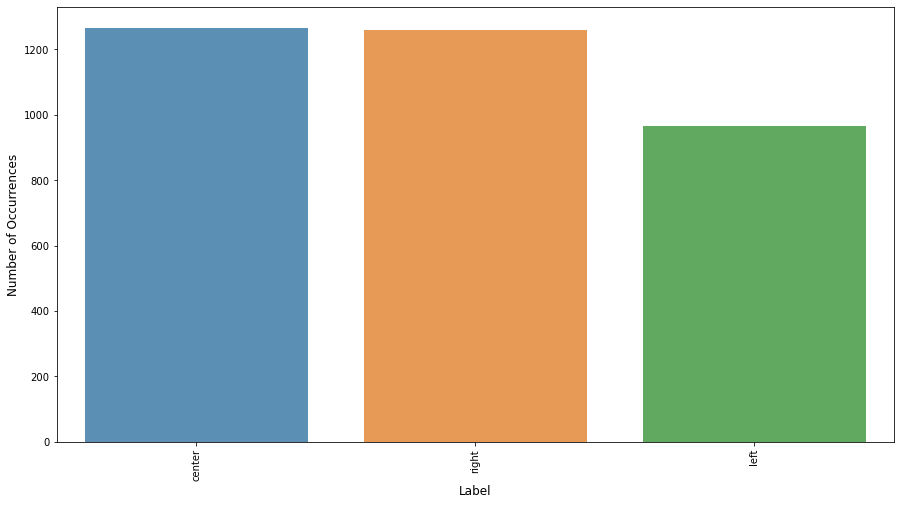

In [43]:
plt.figure(figsize=(15,8))
sns.barplot(cnt_pro.index, cnt_pro.values, alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Label', fontsize=12)
plt.xticks(rotation=90)
plt.show();

In [44]:
def print_article(indx):
    article = df[df.index == indx][['article', 'label']].values[0]
    if len(article) > 0:
        print(article[0])
        print('Label:', article[1])

In [45]:
print_article(12)

“follow the science!” is all we hear, along with how dare we question “the science.” well, let’s bring the vigorous boil down to a low simmer for a minute so we can get to the root of things, shall we?as a layperson, not a scientist or medical professional, i would never offer medical advice. however, i can understand simple english and science, and can apply that knowledge to search for the definition of “science.”perceiving a trend exists, let’s agree for the moment that, in the everyday language we regular folks use, “science” means “what we know” about a specific area of study, research, etc.for example, nearly everyone understands the simple chemical and physical characteristics of water. water (two hydrogen atoms and one oxygen atom) is found in three forms: vapor, liquid, or solid. water boils at 212 degrees fahrenheit and freezes at 32 degrees. we can change those values by introducing variables of salinity or atmospheric pressure, but h2o is a stable compound and provides pred

In [46]:
print_article(45)

washington, d.c. -- ninety-four percent of u.s. adults now approve of marriages between black people and white people, up from 87% in the prior reading from 2013. the current figure marks a new high in gallup's trend, which spans more than six decades. just 4% approved when gallup first asked the question in 1958.line graph. the percentages of americans who approve of marriage between black people and white people. 94% of americans in 2021 approve of these unions, a record in gallup's trend and up from 4% the first time the question was asked in 1958.the latest figure is from a gallup poll conducted july 6-21. shifts in the 63-year-old trend represent one of the largest transformations in public opinion in gallup's history -- beginning at a time when interracial marriage was nearly universally opposed and continuing to its nearly universal approval today.the u.s. supreme court legalized interracial marriage nationwide in the 1967 loving v. virginia case. a year after that decision, gal

In [47]:
from bs4 import BeautifulSoup

In [48]:
def cleanText(text):
    text = BeautifulSoup(text, 'lxml').text
    text = re.sub(r'\|\|\|', r' ', text) 
    text = re.sub(r'http\S+', r'<URL>', text)
    text = text.lower()
    text = text.replace('x', '')
    return text

In [49]:
df.article = df.article.apply(cleanText)

In [50]:
print_article(45)

washington, d.c. -- ninety-four percent of u.s. adults now approve of marriages between black people and white people, up from 87% in the prior reading from 2013. the current figure marks a new high in gallup's trend, which spans more than si decades. just 4% approved when gallup first asked the question in 1958.line graph. the percentages of americans who approve of marriage between black people and white people. 94% of americans in 2021 approve of these unions, a record in gallup's trend and up from 4% the first time the question was asked in 1958.the latest figure is from a gallup poll conducted july 6-21. shifts in the 63-year-old trend represent one of the largest transformations in public opinion in gallup's history -- beginning at a time when interracial marriage was nearly universally opposed and continuing to its nearly universal approval today.the u.s. supreme court legalized interracial marriage nationwide in the 1967 loving v. virginia case. a year after that decision, gall

In [70]:
train, test = train_test_split(df, test_size=0.2, random_state=42)

In [71]:
import nltk
from nltk.corpus import stopwords

In [74]:
def tokenize_text(text):
    tokens = []
    for sent in nltk.sent_tokenize(text):
        for word in nltk.word_tokenize(sent):
            if len(word) < 2:
                continue
            #if word in stopwords:
            #    continue
            tokens.append(word.lower())
    return tokens

In [75]:
train_tagged = train.apply(
    lambda r: TaggedDocument(words=tokenize_text(r['article']),
                             tags=[r.label]), axis=1)

In [76]:
test_tagged = test.apply(
    lambda r: TaggedDocument(words=tokenize_text(r['article']),
                             tags=[r.label]), axis=1)

In [77]:
train_tagged.values[30]

TaggedDocument(words=['freedom', 'of', 'the', 'press', 'is', 'limited', 'to', 'those', 'who', 'own', 'one.', 'h.', 'l.', 'mencken', 'presser', 'is', 'media', 'slang', 'for', 'press', 'conference', 'in', 'theory', 'an', 'opportunity', 'for', 'political', 'mandarins', 'to', 'keep', 'the', 'public', 'informed', 'the', 'difference', 'between', 'trump', 'and', 'biden', 'presser', 'is', 'astonishing', 'especially', 'if', 'there', 'bad', 'news', 'on', 'the', 'front', 'page.president', 'trump', 'was', 'savaged', 'daily', 'by', 'rude', 'often', 'nasty', 'reporters', 'president', 'biden', 'amidst', 'the', 'ongoing', 'afghan', 'crisis', 'is', 'gifted', 'with', 'softballs', 'from', 'the', 'same', 'journalists', 'adding', 'insult', 'to', 'alibi', 'the', 'press', 'has', 'covid-19', 'and', 'hurricane', 'ida', 'as', 'an', 'ecuse', 'to', 'avoid', 'covering', 'the', 'unfolding', 'disaster', 'in', 'south', 'asia.before', 'bidens', 'big', 'fail', 'is', 'consigned', 'to', 'page', 'si', 'group', 'of', 'erst

In [78]:
import multiprocessing
cores = multiprocessing.cpu_count()

In [79]:
model_dbow = Doc2Vec(dm=0, vector_size=300, negative=5, hs=0, min_count=2, sample = 0, workers=cores)
model_dbow.build_vocab([x for x in tqdm(train_tagged.values)])

100%|██████████████████████████████████| 2793/2793 [00:00<00:00, 1062460.65it/s]


In [80]:
%%time
for epoch in range(30):
    model_dbow.train(utils.shuffle([x for x in tqdm(train_tagged.values)]), total_examples=len(train_tagged.values), epochs=1)
    model_dbow.alpha -= 0.002
    model_dbow.min_alpha = model_dbow.alpha

100%|██████████████████████████████████| 2793/2793 [00:00<00:00, 1156093.07it/s]


CPU times: user 9min 19s, sys: 1.68 s, total: 9min 20s
Wall time: 43.3 s


In [88]:
def vec_for_learning(model, tagged_docs):
    sents = tagged_docs.values
    targets, regressors = zip(*[(doc.tags[0], model.infer_vector(doc.words, epochs=20)) for doc in sents])
    return targets, regressors

In [89]:
y_train, X_train = vec_for_learning(model_dbow, train_tagged)

In [90]:
y_test, X_test = vec_for_learning(model_dbow, test_tagged)

In [94]:
logreg = LogisticRegression(n_jobs=1, C=1e5, max_iter=10000)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

In [95]:
from sklearn.metrics import accuracy_score, f1_score

print('Testing accuracy %s' % accuracy_score(y_test, y_pred))
print('Testing F1 score: {}'.format(f1_score(y_test, y_pred, average='weighted')))

Testing accuracy 0.4978540772532189
Testing F1 score: 0.5005227931911534


In [96]:
model_dmm = Doc2Vec(dm=1, dm_mean=1, vector_size=300, window=10, negative=5, min_count=1, workers=5, alpha=0.065, min_alpha=0.065)
model_dmm.build_vocab([x for x in tqdm(train_tagged.values)])

100%|██████████████████████████████████| 2793/2793 [00:00<00:00, 1347755.53it/s]


In [97]:
%%time
for epoch in range(30):
    model_dmm.train(utils.shuffle([x for x in tqdm(train_tagged.values)]), total_examples=len(train_tagged.values), epochs=1)
    model_dmm.alpha -= 0.002
    model_dmm.min_alpha = model_dmm.alpha

100%|██████████████████████████████████| 2793/2793 [00:00<00:00, 1274166.96it/s]


CPU times: user 9min 41s, sys: 987 ms, total: 9min 42s
Wall time: 1min 58s


In [98]:
y_train, X_train = vec_for_learning(model_dmm, train_tagged)
y_test, X_test = vec_for_learning(model_dmm, test_tagged)

logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

print('Testing accuracy %s' % accuracy_score(y_test, y_pred))
print('Testing F1 score: {}'.format(f1_score(y_test, y_pred, average='weighted')))

Testing accuracy 0.9742489270386266
Testing F1 score: 0.9742896565537155


In [102]:
from gensim.test.test_doc2vec import ConcatenatedDoc2Vec
new_model = ConcatenatedDoc2Vec([model_dbow, model_dmm])

In [105]:
def get_vectors(model, tagged_docs):
    sents = tagged_docs.values
    targets, regressors = zip(*[(doc.tags[0], model.infer_vector(doc.words, epochs=20)) for doc in sents])
    return targets, regressors

In [106]:
y_train, X_train = get_vectors(new_model, train_tagged)
y_test, X_test = get_vectors(new_model, test_tagged)

logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

print('Testing accuracy %s' % accuracy_score(y_test, y_pred))
print('Testing F1 score: {}'.format(f1_score(y_test, y_pred, average='weighted')))

Testing accuracy 0.9670958512160229
Testing F1 score: 0.9672413205550757
